In [5]:
# Ô 1: Import thư viện và Định nghĩa Hàm
import matplotlib.pyplot as plt
import numpy as np
import os
import random # Thêm thư viện random
from tqdm import tqdm # Thêm thư viện tqdm

# --- SAO CHÉP HÀM parse_skeleton_file TỪ train.py (V3) ---
def parse_skeleton_file(filepath):
    """Đọc và phân tích file .skeleton (Phiên bản V3 - Bật lại Log)."""
    try:
        with open(filepath, 'r') as f: lines = f.readlines()
        if not lines: tqdm.write(f"\n[Lỗi Parse] File {filepath} trống."); return None
        try: expected_frame_count = int(lines[0].strip())
        except (ValueError, IndexError): tqdm.write(f"\n[Lỗi Parse] File {filepath} không đọc được frame count."); return None
        frames_data = []; line_idx = 1; valid_frames_count = 0
        while line_idx < len(lines): # Thay vòng lặp for bằng while
            current_frame_start_line = line_idx
            try:
                if line_idx >= len(lines): break
                body_count_str = lines[line_idx].strip()
                if not body_count_str: break
                body_count = int(body_count_str); line_idx += 1
                if body_count == 0:
                     actual_frames_read += 1 # Vẫn tính là đã đọc frame header
                     # Tìm dòng frame tiếp theo (có thể không chính xác 100% nếu file lỗi nặng)
                     temp_idx = line_idx
                     found_next_frame = False
                     while temp_idx < len(lines):
                          try: next_body_count = int(lines[temp_idx].strip()); line_idx = temp_idx; found_next_frame = True; break
                          except ValueError: temp_idx += 1
                     if not found_next_frame: line_idx = len(lines)
                     continue # Chuyển sang lần lặp while tiếp theo
                best_body_joints = None
                for j in range(body_count):
                    if line_idx + 1 >= len(lines): line_idx = len(lines); break
                    try: line_idx += 1; joint_count_str = lines[line_idx].strip(); joint_count = int(joint_count_str); line_idx += 1
                    except (ValueError, IndexError): line_idx += 25; continue # Bỏ qua body nếu lỗi header
                    if line_idx + joint_count > len(lines): line_idx = len(lines); break # File cắt cụt
                    current_body_joints = []; valid_body = True; k=0
                    for k in range(joint_count):
                        try: joint_info = lines[line_idx].strip().split(); current_body_joints.append([float(coord) for coord in joint_info[:3]]); line_idx += 1
                        except (ValueError, IndexError): line_idx += (joint_count - k); valid_body = False; break # Lỗi khớp, bỏ qua body
                    if j == 0 and valid_body: # Chỉ lấy body đầu tiên hợp lệ
                        while len(current_body_joints) < 25: current_body_joints.append([0.0, 0.0, 0.0])
                        best_body_joints = np.array(current_body_joints[:25])
                    elif j > 0 : # Bỏ qua các body thừa hiệu quả hơn
                         lines_to_skip_approx = 1 + 1 + joint_count # bodyInfo + jointCount + joints
                         line_idx += lines_to_skip_approx
                         if line_idx >= len(lines): break
                if line_idx >= len(lines): break
                if best_body_joints is not None: frames_data.append(best_body_joints); valid_frames_count += 1
                actual_frames_read += 1 # Đã xử lý xong (hoặc bỏ qua) 1 frame
            except (ValueError, IndexError, Exception) as e_frame: break # Dừng đọc nếu lỗi header frame
        if frames_data: return np.array(frames_data)
        else: return None
    except Exception as e: return None
# --- KẾT THÚC HÀM parse ---

# --- HÀM plot_skeleton (Giữ nguyên) ---
def plot_skeleton(joints_data, frame_num):
    x = joints_data[:, 0]; y = joints_data[:, 1]
    connections = [(0, 1), (1, 20), (20, 2), (2, 3), (20, 4), (4, 5), (5, 6), (6, 7), (7, 21), (7, 22), (20, 8), (8, 9), (9, 10), (10, 11), (11, 23), (11, 24), (0, 12), (12, 13), (13, 14), (14, 15), (0, 16), (16, 17), (17, 18), (18, 19)]
    plt.figure(figsize=(6, 8)); plt.scatter(x, y, c='red', s=40)
    for (start_joint, end_joint) in connections:
        if start_joint < len(x) and end_joint < len(x): plt.plot([x[start_joint], x[end_joint]], [y[start_joint], y[end_joint]], 'b-')
    plt.title(f"Khung xương 2D - Frame {frame_num}"); plt.xlabel("Tọa độ X"); plt.ylabel("Tọa độ Y"); plt.gca().set_aspect('equal', adjustable='box'); plt.show()
# --- KẾT THÚC HÀM plot ---

# --- HÀM chọn file ngẫu nhiên (sửa lại để tìm trong nhiều thư mục con) ---
def get_random_skeleton_file_from_all(base_dir):
    all_skeleton_files = []
    try:
        # Duyệt qua tất cả các thư mục con (lớp)
        for class_name in os.listdir(base_dir):
            class_dir = os.path.join(base_dir, class_name)
            if os.path.isdir(class_dir):
                # Lấy tất cả file .skeleton trong thư mục lớp
                for file_name in os.listdir(class_dir):
                    if file_name.endswith('.skeleton'):
                        all_skeleton_files.append(os.path.join(class_dir, file_name))
        
        if not all_skeleton_files:
            print(f"Lỗi: Không tìm thấy file .skeleton nào trong '{base_dir}' hoặc các thư mục con.")
            return None
        
        # Chọn ngẫu nhiên một file từ danh sách tất cả các file
        return random.choice(all_skeleton_files)

    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy thư mục '{base_dir}'")
        return None
    except Exception as e:
        print(f"Đã xảy ra lỗi không mong muốn: {e}")
        return None
# --- KẾT THÚC HÀM get_random ---

print("Đã định nghĩa các hàm.")

Đã định nghĩa các hàm.


In [6]:
# Ô 2: Thiết lập Đường dẫn
import os

# --- GÁN ĐƯỜNG DẪN TUYỆT ĐỐI ---
PROJECT_ROOT_DIR = r"D:\code_etc\Python\_File_code\Pose_estimation_Final"
# --------------------------------

# Đường dẫn đến thư mục chứa dữ liệu NTU đã lọc
FILTERED_DATA_DIR = os.path.join(PROJECT_ROOT_DIR, 'data', 'processed', 'ntu_filtered_skeletons')

print(f"Thư mục gốc dự án: {PROJECT_ROOT_DIR}")
print(f"Thư mục dữ liệu NTU đã lọc: {FILTERED_DATA_DIR}")

Thư mục gốc dự án: D:\code_etc\Python\_File_code\Pose_estimation_Final
Thư mục dữ liệu NTU đã lọc: D:\code_etc\Python\_File_code\Pose_estimation_Final\data\processed\ntu_filtered_skeletons



Đã chọn file ngẫu nhiên: D:\code_etc\Python\_File_code\Pose_estimation_Final\data\processed\ntu_filtered_skeletons\lying_down\S007C001P026R002A043.skeleton
File chứa 1 frame hợp lệ.

Đang vẽ 1 frame ngẫu nhiên: [0]


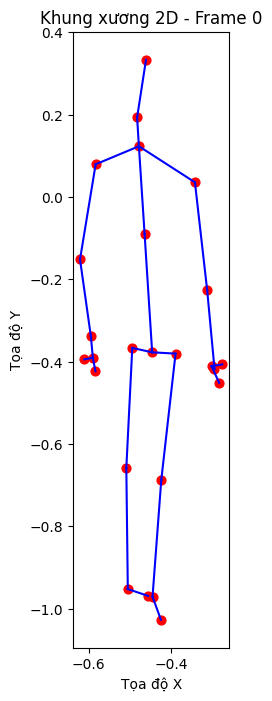

In [96]:
# Ô 3: Chọn File Ngẫu nhiên và Xử lý
import numpy as np # Cần numpy ở đây

# 1. Chọn ngẫu nhiên một file từ thư mục dữ liệu đã lọc
random_file_path = get_random_skeleton_file_from_all(FILTERED_DATA_DIR)

if random_file_path:
    print(f"\nĐã chọn file ngẫu nhiên: {random_file_path}")

    # 2. Phân tích file đã chọn
    # Lưu ý: Hàm parse mới trả về (T, 25, 3) trực tiếp
    all_frames_data = parse_skeleton_file(random_file_path) 

    if all_frames_data is not None and all_frames_data.shape[0] > 0:
        num_frames = all_frames_data.shape[0]
        print(f"File chứa {num_frames} frame hợp lệ.")

        # 3. Chọn ngẫu nhiên 5 frame (hoặc ít hơn nếu file quá ngắn)
        num_frames_to_plot = min(5, num_frames) # Lấy tối đa 5 frame
        
        if num_frames_to_plot > 0:
            # Chọn ngẫu nhiên 'num_frames_to_plot' chỉ số không trùng lặp
            random_indices = random.sample(range(num_frames), num_frames_to_plot)
            random_indices.sort() # Sắp xếp để vẽ theo thứ tự thời gian (tùy chọn)
            
            print(f"\nĐang vẽ {num_frames_to_plot} frame ngẫu nhiên: {random_indices}")
            
            # 4. Vẽ skeleton cho từng frame đã chọn
            for frame_idx in random_indices:
                skeleton_data = all_frames_data[frame_idx] # Lấy dữ liệu frame (25, 3)
                if skeleton_data is not None: # Kiểm tra lại phòng trường hợp lỗi
                    plot_skeleton(skeleton_data, frame_idx)
                else:
                    print(f"Lỗi: Không lấy được dữ liệu skeleton cho frame {frame_idx}")
        else:
            print("File không có frame hợp lệ để vẽ.")

    else:
        print("\nLỗi: Không thể đọc hoặc file skeleton rỗng/lỗi.")
else:
    print("\nKhông thể chọn được file skeleton ngẫu nhiên.")